# 1. Bibliotecas/Pacotes

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate

from matplotlib import pyplot as plt
import plotly.express as px

1.1 Funções Auxiliares

In [2]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

# 2. Extração e vizualização de dados

In [3]:
# Importando dataset
data = pd.read_csv( 'kc_house_data.csv' )

In [6]:
data = data.sample(n=10000)

In [8]:
# Dimensão dos dados
print( 'Number of Rows:{}'.format( data.shape[0] ) )
print( 'Number of Columns {}'.format( data.shape[1] ) )

Number of Rows:10000
Number of Columns 21


In [9]:
# Tipos de variáveis
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# 4. Transformação de dados

In [10]:
#Convertendo a variável objeto em data
data['date'] = pd.to_datetime( data['date'] )

# 5. Análise descritiva

        atributos     media   mediana       std        min      max
0           price 539251.98 449250.00 362143.81 7062500.00 82000.00
1        bedrooms      3.37      3.00      0.91      10.00     0.00
2       bathrooms      2.12      2.25      0.77       6.75     0.00
3     sqft_living   2075.36   1910.00    908.97   10040.00   290.00
4        sqft_lot  14984.89   7610.50  42190.36 1651359.00   649.00
5          floors      1.49      1.50      0.54       3.50     1.00
6      waterfront      0.01      0.00      0.09       1.00     0.00
7            view      0.24      0.00      0.77       4.00     0.00
8       condition      3.41      3.00      0.65       5.00     1.00
9           grade      7.65      7.00      1.18      13.00     1.00
10     sqft_above   1782.58   1560.00    820.31    8020.00   290.00
11  sqft_basement    292.78      0.00    445.02    3260.00     0.00
12       yr_built   1971.12   1975.00     29.34    2015.00  1900.00
13   yr_renovated     84.01      0.00    400.72 

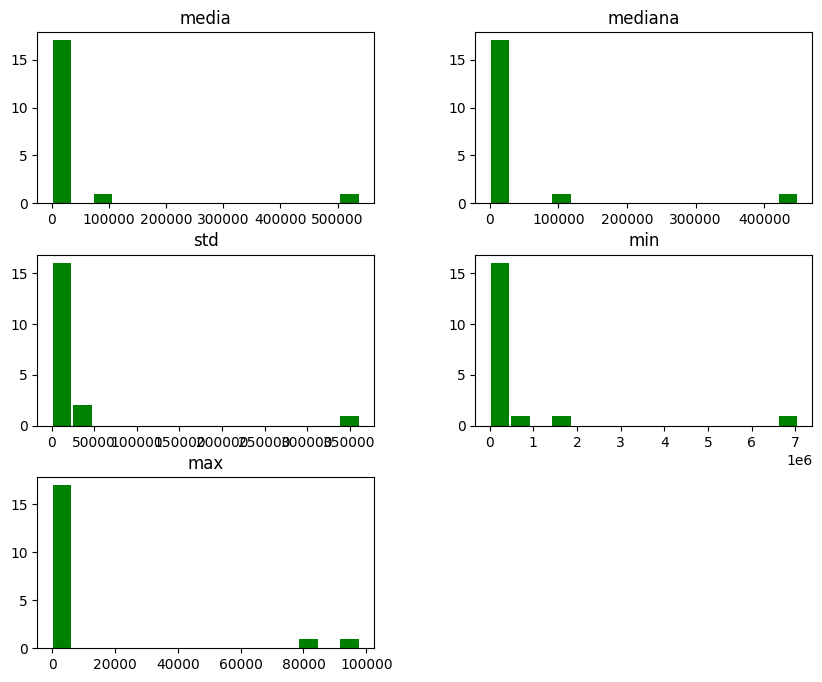

In [11]:
#Incluindo somente variáveis numéricas
num_atributos = data.select_dtypes(include = ['int64', 'float64'])

#deletando a coluna 'ID'
num_atributos = num_atributos.iloc[:, 1: ]

# Medidas de tendência central:
data_mean =  pd.DataFrame(num_atributos.apply(np.mean)).T
data_median = pd.DataFrame(num_atributos.apply(np.median)).T

# Medidas de dispersão
std = pd.DataFrame( num_atributos.apply( np.std ) ).T
max_ = pd.DataFrame( num_atributos.apply( np.max ) ).T
min_ = pd.DataFrame( num_atributos.apply( np.min ) ).T

# Concatenando as medidas geradas
df = pd.concat( [data_mean, data_median, std, max_, min_ ]).T.reset_index()

# Alterando o nome das colunas
df.columns = [ 'atributos','media', 'mediana', 'std', 'min', 'max']
print(df)

df[['media', 'mediana', 'std', 'min', 'max']].hist(
    bins=15,
    figsize=(10, 8),
    grid = False,
    rwidth = 0.9,
    color = "Green",
)
plt.show()

- Criação de novos atributos

In [12]:
data['year_construc'] = data['yr_built'].apply(lambda x: "1930 - 1955" if x < 1955 else "1955 - 2015") 

data['andares'] = data['floors'] .apply(lambda x: '2 or less' if x <= 2 else 'more than 3')

data['boa_vista'] = data['view'].apply(lambda x: 'Boa' if x == 3 else 
                                                 'Boa para ruim')

data['basement'] = data['sqft_basement'].apply(lambda x: "Imóveis com porão" if x > 0 else "Imóveis sem porão")                                                  

data['renovacao'] = data['yr_renovated'].apply(lambda x: 'sim' if x > 0 else
                                                        'nao'   )

data['quartos'] = data['bedrooms'].apply(lambda x: 'sim' if x <= 3
                                                  else 'não')                                                        

data['mes'] = data['date'].dt.month
data['ano'] = data['date'].dt.year

data['quarto'] = data['bedrooms'].apply(lambda x: "Mais de 3 quartos" if x > 3 else "Menos de três quartos") 

data['season'] = data['mes'].apply(lambda x: 'summer' if (x > 5) & (x < 8) else
                                           'spring' if (x > 2) & (x < 5) else
                                           'fall' if (x > 8) & (x < 12) else
                                           'winter') 

# 6. Limpeza de dados

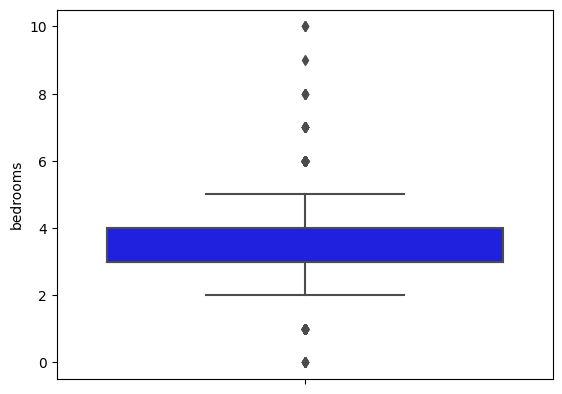

In [13]:
data = data.copy()

# Verificando valores ausentes (NaN's) nos dados
data.isnull().sum()

# Verificando IDs duplicados nos dados
data.sort_values('id').head(6)

# Descartando os valores duplicados
data = data.drop_duplicates(subset = ['id'], keep = 'last')
data.sort_values('id').head(6)

# Verificando os outliers
# Gráfico box-plot para observar o outilier presente em bedrooms
fig, axes = plt.subplots(1)
sns.boxplot( y=data["bedrooms"], color="blue",orient='v');
plt.show()

'''
Observou-se na variável 'bedrooms', que há uma casa com 33 quartos. Porém, ao relizar algumas análises e observar
o gráfico box-plot abaixo, notou-se que tal número pode indicar um erro de digitação. Tal questão, é afirmado
pois o preço e tamanho da casa estão dentro do esperado para imóveis que possuem três quatos. Dessa forma, 
o valor de 33 quartos foi substituído como de três quartos.
'''
# substituindo o número 33 pelo número 3
data['bedrooms'] = data['bedrooms'] .replace(['33'],'3')




# 7. Exploração dos dados

4.1 inserir um gráfico aqui, Ray usou correlação. O que devo usar? Para visualizar meus dados?

# 8. Insights

Hipótese 1:  Imóveis com vista para a água são em média 30% mais caros

A hipótese é verdadeira


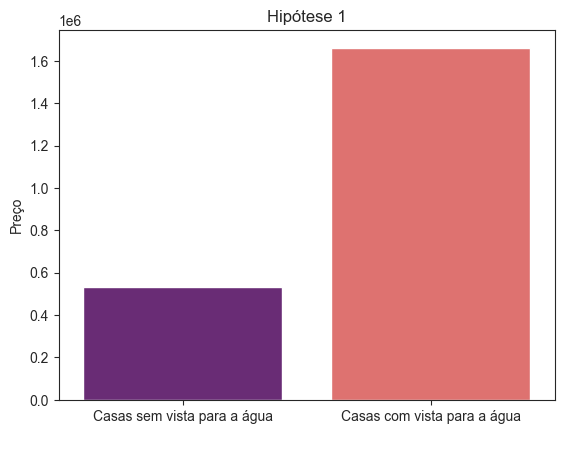

In [172]:
data = data.copy()

h1 = data[['price', 'waterfront']].groupby('waterfront').mean().reset_index()
h1['percentage'] = h1['price'].pct_change()*100

if h1.loc[1, 'percentage'] > 30:
    print('A hipótese é verdadeira')

else:
    print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig = sns.barplot(x = 'waterfront',
            y = 'price',
            data = h1,
            palette = "magma")
# Show the plot
# add label to the axis and label to the plot

fig.set(xlabel =" ", ylabel = "Preço", title ='Hipótese 1',
xticklabels=["Casas sem vista para a água", "Casas com vista para a água"])
plt.show()

Hipótese 2: Imóveis construídos antes de 1955 são 50% mais baratos, na média

A hipótese é falsa


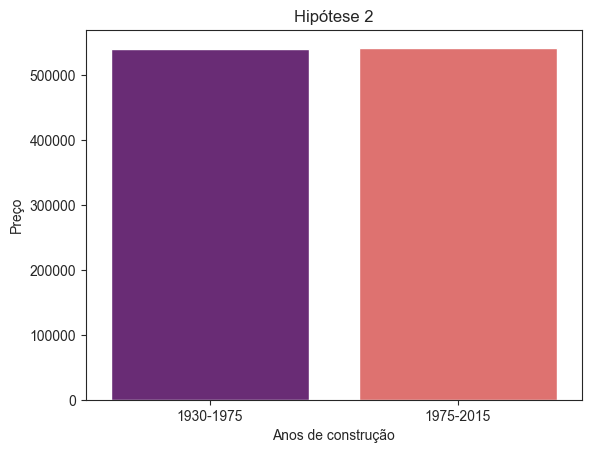

In [173]:
h2 = data[['year_construc', 'price']].groupby('year_construc').mean().reset_index()
h2['porcentagem'] = h2['price'].pct_change()*100

if h2.loc[1, 'porcentagem'] > 50:
        print('A hipótese é verdadeira')
else:
        print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig2 = sns.barplot(x = 'year_construc',
            y = 'price',
            data = h2,
            palette = "magma")
fig2.set(xlabel ="Anos de construção", ylabel = "Preço", title ='Hipótese 2',
xticklabels=["1930-1975", "1975-2015"])
plt.show()

Hipótese 3: Imóveis sem porão possuem área total 40% maior que os imóveis com porão

A hipótese é falsa


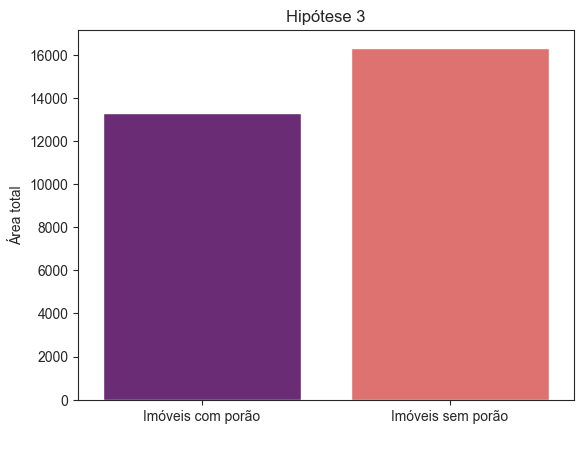

In [169]:
h3 = data[['basement', 'sqft_lot']].groupby('basement').mean().reset_index()
h3['porcentagem'] = h3['sqft_lot'].pct_change()*100

if h3.loc[1, 'porcentagem'] > 40:
        print('A hipótese é verdadeira')
else:
        print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig3 = sns.barplot(x = 'basement',
            y = 'sqft_lot',
            data = h3,
            palette = "magma")
fig3.set(xlabel =" ", ylabel = "Área total", title ='Hipótese 3',
xticklabels=["Imóveis com porão", "Imóveis sem porão"])
plt.show()

Hipótese 4:  O crescimento do preço dos imóveis ano após ano (YoY) é de 10%

A hipótese é falsa


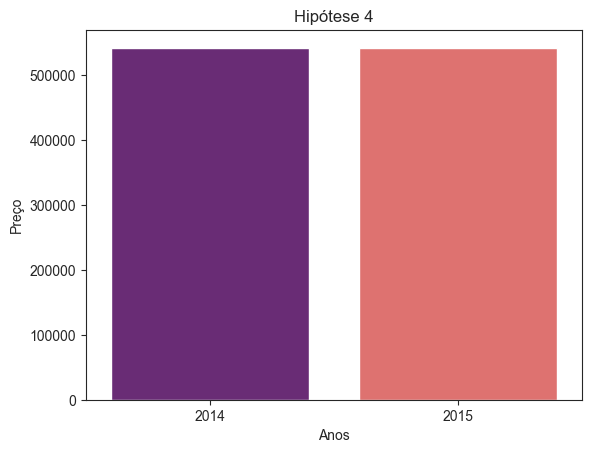

In [171]:
h4 = data.copy()
h4['Year'] = h4['date'].dt.strftime('%Y')
h4 = h4[['Year', 'price']].groupby('Year').mean().reset_index()
h4['porcentagem'] = h4['price'].pct_change()*100

if h4.loc[1, 'porcentagem'] > 10:
        print('A hipótese é verdadeira')
else:
        print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig4 = sns.barplot(x = 'Year',
            y = 'price',
            data = h4,
            palette = "magma")
fig4.set(xlabel ="Anos", ylabel = "Preço", title ='Hipótese 4',
xticklabels=["2014", "2015"])
plt.show()

Hipótese 5: Imóveis com 3 banheiros tem um crescimento de MoM de 15%

c:\Users\karin\anaconda3\envs\programacao_passo_zero\lib\site-packages\matplotlib\axes\_axes.py:1174: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\karin\anaconda3\envs\programacao_passo_zero\lib\site-packages\matplotlib\axes\_axes.py:1175: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


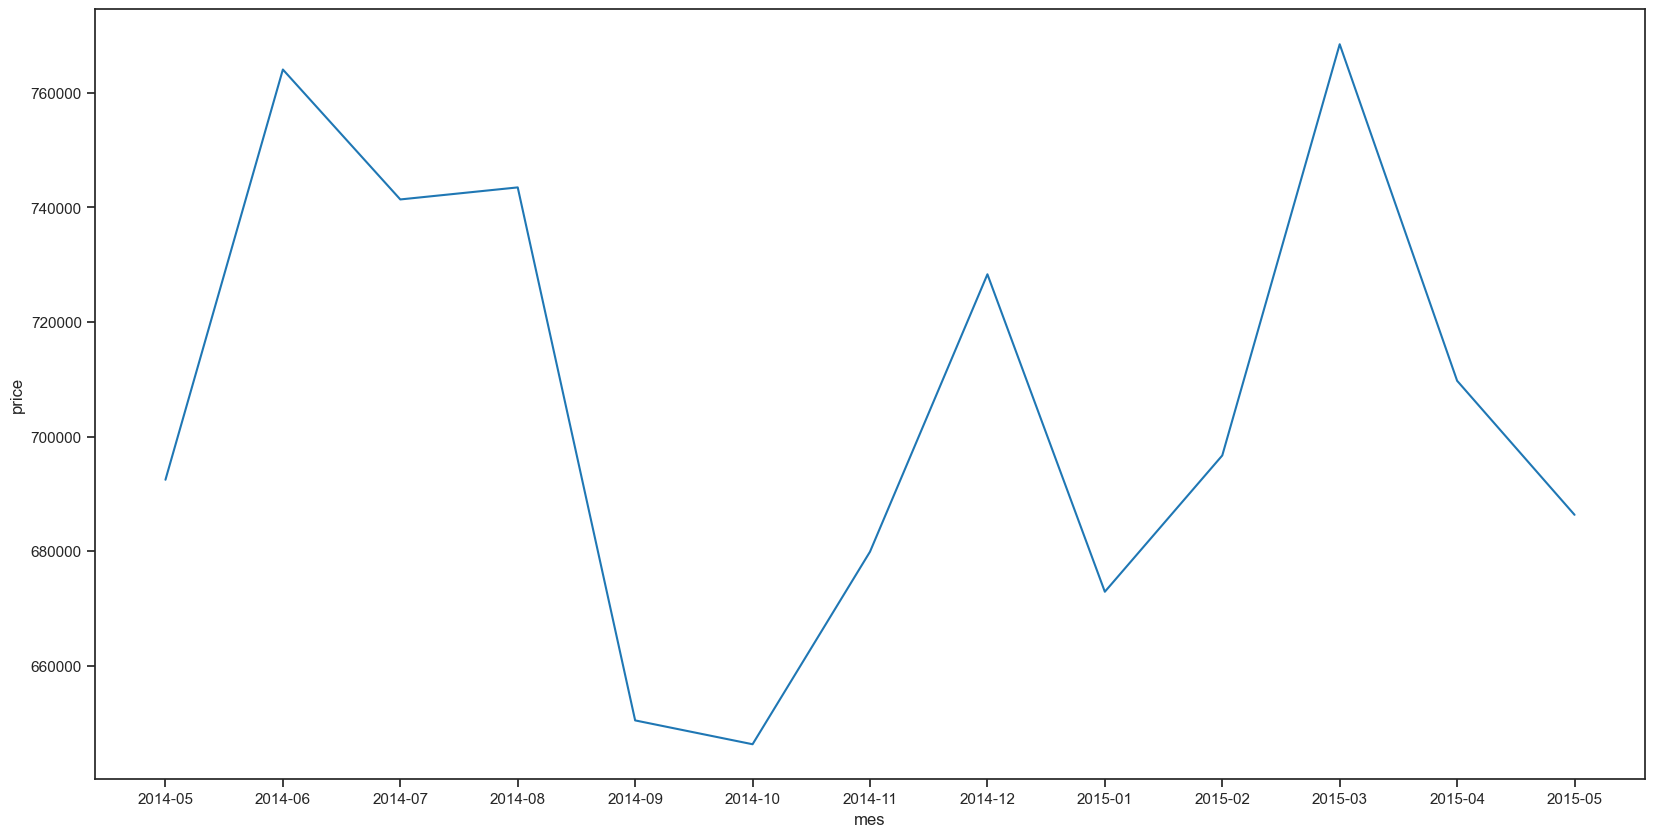

In [195]:
h5 = data.loc[data['bathrooms'] == 3].copy()
h5['mes'] = h5['date'].dt.strftime('%Y-%m')
h5 = h5[['mes', 'price']].groupby('mes').mean().reset_index()
h5['porcentagem'] = h5['price'].pct_change()*100
h5['pct'] = h5['porcentagem'].apply(lambda x: 'Verdadeira' if x > 0 else 'Falsa')

plt.rcParams['figure.figsize'] = [ 20, 10 ]
sns.set_context('notebook')
sns.lineplot(x = "mes", y = "price",data=h5, err_style="bars")
plt.show()

Hipótese 6: Imóveis com dois andares ou menos, são 40% mais baratos

A hipótese é verdadeira


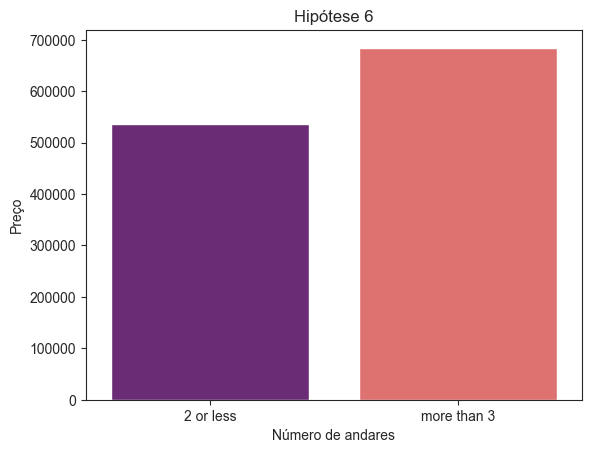

In [154]:
h6 = data[['andares', 'price']].groupby('andares').mean().reset_index()
h6['porcetagem'] = h6['price'].pct_change()*100

if h6.loc[1, 'porcetagem'] < 40:
    print('A hipótese é verdadeira')
else: 
    print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig6 = sns.barplot(x = 'andares',
            y = 'price',
            data = h6,
            palette = "magma")
fig6.set(xlabel ="Número de andares", ylabel = "Preço", title ='Hipótese 6')
plt.show()

Hipótese 7: Imóveis não reformados são 35% mais baratos

A hipótese é verdadeira


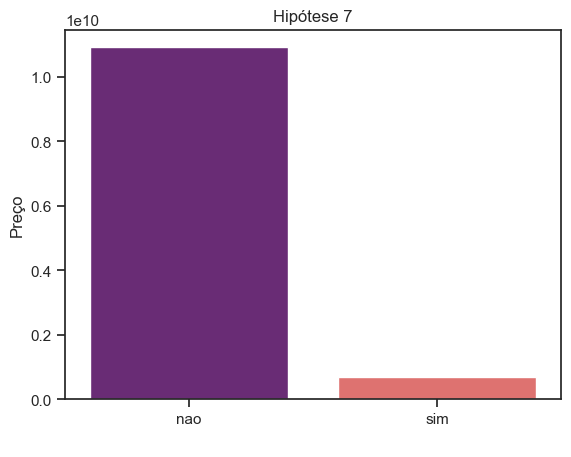

In [175]:
h7 = data[data['condition'] == 1]
h7 = data[['price', 'renovacao']].groupby('renovacao').sum().reset_index()
h7['porcetagem'] = h7['price'].pct_change()*100

if h7.loc[1, 'porcetagem'] < 35:
    print('A hipótese é verdadeira')
else: 
    print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig7 = sns.barplot(x = 'renovacao',
            y = 'price',
            data = h7,
            palette = "magma")
fig7.set(xlabel =" ", ylabel = "Preço", title ='Hipótese 7')
plt.show()

Hipótese 8: Imóveis com melhores vistas são 25% mais caros

A hipótese é verdadeira


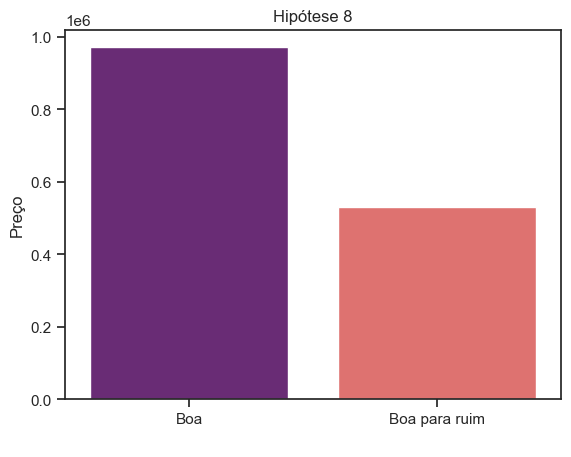

In [176]:
h8 = data[['boa_vista', 'price']].groupby('boa_vista').mean().reset_index()
h8['porcentagem'] = h8['price'].pct_change()*-100

if h8.loc[1, 'porcentagem'] > 25:
    print('A hipótese é verdadeira')
else: 
    print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig8 = sns.barplot(x = 'boa_vista',
            y = 'price',
            data = h8,
            palette = "magma")
fig8.set(xlabel =" ", ylabel = "Preço", title ='Hipótese 8')
plt.show()

Hipótese 9: Imóveis com menos de três quartos são 15% mais baratos

A hipótese é falsa


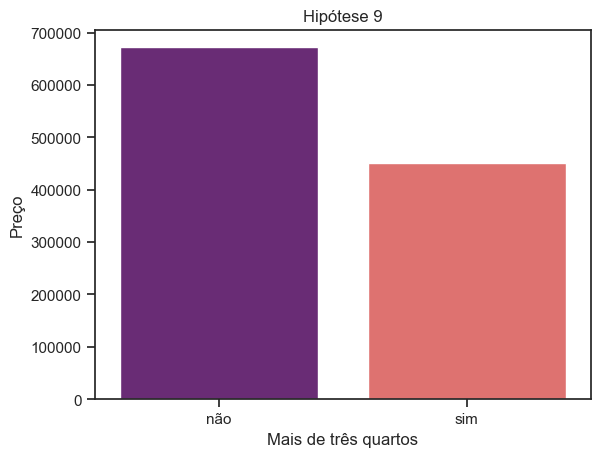

In [177]:
h9 = data[['quartos', 'price']].groupby('quartos').mean().reset_index()
h9['porcentagem'] = h8['price'].pct_change()*-100

if h9.loc[1, 'porcentagem'] < 15:
    print('A hipótese é verdadeira')
else: 
    print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig9 = sns.barplot(x = 'quartos',
            y = 'price',
            data = h9,
            palette = "magma")
fig9.set(xlabel ="Mais de três quartos", ylabel = "Preço", title ='Hipótese 9')
plt.show()

Hipótese 10: Imóveis com mais de três quatros tem área total 15% maior que os imóveis com menos de três quatros

A hipótese é verdadeira


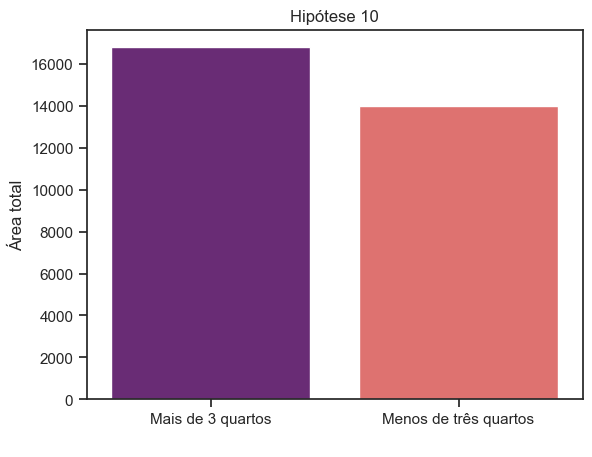

In [178]:
h10 = data[['quarto', 'sqft_lot']].groupby('quarto').mean().reset_index()
h10['porcentagem'] = h10['sqft_lot'].pct_change()*-100

if h10.loc[1, 'porcentagem'] > 15:
        print('A hipótese é verdadeira')
else:
        print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig10 = sns.barplot(x = 'quarto',
            y = 'sqft_lot',
            data = h10,
            palette = "magma")
fig10.set(xlabel =" ", ylabel = "Área total", title ='Hipótese 10')
plt.show()

In [ ]:
if h3.loc[1, 'porcentagem'] > 40:
        print('A hipótese é verdadeira')
else:
        print('A hipótese é falsa')

# Plotando a figura
sns.set_style("ticks")
fig3 = sns.barplot(x = 'basement',
            y = 'sqft_lot',
            data = h3,
            palette = "magma")
fig3.set(xlabel =" ", ylabel = "Área total", title ='Hipótese 3',
xticklabels=["Imóveis com porão", "Imóveis sem porão"])
plt.show()

In [ ]:
data['basement'] = data['sqft_basement'].apply(lambda x: "Imóveis com porão" if x > 0 else "Imóveis sem porão") 
h3 = data[['basement', 'sqft_lot']].groupby('basement').mean().reset_index()
h3['porcentagem'] = h3['sqft_lot'].pct_change()*100

# 9. Questões de negócio

1 - Quais são os negócios que a House Rocket deveria comprar e por qual preço?

In [8]:
df1 = data.copy()

median_price = df1[['zipcode', 'price']].groupby('zipcode').median().reset_index()
date2 = pd.merge(median_price, df1, on='zipcode', how = 'inner')

date2 = date2.rename(columns = {'price_y' : 'price', 'price_x' : 'median_price'} ) 


for i in range(len(date2)):
    if ((date2.loc[i, 'price'] < date2.loc[i, 'median_price']) 
        & (date2.loc[i, 'condition'] >= 3)):
         date2.loc[i,'buy'] =  'Recomendado'
    else:
        date2.loc[i, 'buy'] = 'Não'

#Casas para comprar
comprar = date2[date2['buy'] == 'Recomendado']

comprar['buy'].shape[0]
comprar[['id', 'price', 'buy']]

,id,price,buy
5,3353400435,230000.00,Recomendado
6,9262800171,252000.00,Recomendado
7,3353401710,227950.00,Recomendado
8,8159610030,196000.00,Recomendado
10,7967200060,243000.00,Recomendado
...,...,...,...
21606,2771604196,465000.00,Recomendado
21607,2770601457,542300.00,Recomendado
21608,2770601912,570000.00,Recomendado
21611,2770601782,453000.00,Recomendado


2- Uma vez comprado, qual é o melhor momento para vendê-lo e por qual preço?

In [ ]:
date3 = date2.copy()

date3 = date2[date2['buy'] == 'Recomendado']

date4 = date3[['season', 'zipcode', 'price']].groupby(['zipcode', 'season']).median().reset_index()

date5 = date4.rename(columns = {'price' : 'price_medi_season', 'season': 'season_median'} ) 

date6 = pd.merge(date4, date5, on='zipcode', how = 'inner')

for i, row in date6.iterrows():
    if (row['price_medi_season'] > row['price']):
        date6.loc[i, 'sale'] =  row['price'] * 1.1
    else:
        date6.loc[i, 'sale'] = row['price'] * 1.3

# Plotando a figura
sns.set_style("ticks")
fig = sns.barplot(x = 'season',
            y = 'sale',
            data = date6,
            palette = "magma")
# Show the plot
# add label to the axis and label to the plot

fig.set(xlabel ="Season", ylabel = "Sale", title ='Best time to sell the property')
plt.show()

- Resultado do negócio - Lucro para a empresa

In [ ]:
date6 ['lucro'] = date6['sale'] - date6['price']
date6['lucro'].sum()

In [187]:
values = [['Hipótese','Parecer','Explicação'],
['H1','Verdadeira','Imóveis com vista para água são mais caros'],
['H2','Falsa','A data de construção dos imóveis não afetam o preço'],
['H3','Verdadeira','Imóveis sem porão possuem maior área total e são mais caros'],
['H4','Verdadeira','Imóveis sem reforma são mais baratos'],
['H5','Falsa','Imóveis com más condições e com vista ruim são mais caros'],
['H6','Verdadeira','Imóveis com menos andares são mais baratos'],
['H7','Verdadeira','Imóveis que não foram reformados são mais baratos'],
['H8','Verdadeira','Imóveis com melhores vistas são mais caros'],
['H9','Falsa', 'Os imóveis  com menos de três quartos não são mais baratos' ],
['H10','Verdadeira','Imóveis com mais de três quartos tem área total maior']

 
 ]

print(tabulate (values, headers = 'firstrow'))

Hipótese    Parecer     Explicação
----------  ----------  -----------------------------------------------------------
H1          Verdadeira  Imóveis com vista para água são mais caros
H2          Falsa       Imóveis com data de construção não afeta o preço
H3          Verdadeira  Imóveis sem porão possuem maior área total e são mais caros
H4          Verdadeira  Imóveis sem reforma são mais baratos
H5          Falsa       Imóveis com más condições e com vista ruim são mais caros
H6          Verdadeira  Imóveis com menos andares são mais baratos
H7          Verdadeira  Imóveis que não foram reformados são mais baratos
H8          Verdadeira  Imóveis com melhores vistas são mais caroa
H9          Falsa       Os imóveis  com menos de três quartos não são mais baratos
H10         Verdadeira  Imóveis com mais de três quartos tem área total maior
